In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [247]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as np
import pandas as pd
from VIGA_METALICA_VERIFICA import *
from FINITO_FEM_TOOLBOX import *
from datetime import datetime


In [248]:
ELEMENTO_ANALISADO = [2,5]

#150 X 18,0
P1 = ['NORMAL', 200E9, 12E9] #E MPa      6%         
P2 = ['NORMAL', 250E6, 15E6] #Fy MPa   6%            
P3 = ['NORMAL', 20000, 2000] #F N     10%
P4 = ['NORMAL', 1, 0.03] #Incerteza de Modelo 1 adimensional 3%
P5 = ['NORMAL', 1, 0.03] #Incerteza de Modelo 2 adimensional 3%
P6 = ['NORMAL', 139, 6.95] #H_W mm 5%
P7 = ['NORMAL', 5.8, 0.29] #T_W mm 5%
P8 = ['NORMAL', 102, 5.1] #B_F mm 5%
P9 = ['NORMAL', 7.1, 0.355] #T_F mm 5%
P10 = ['NORMAL', 139.4, 6.97] #Z cm3 5%
P11 = ['NORMAL', 939, 46.95] #I cm4 

POP = [1]

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

#carta_total = carga G + carga Q

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 3,
        'D': 11 , #variables
        'VARS': [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11],
        'MODEL': 'MCS'}

In [253]:
def OBJ(X):
    
    E = X[0]
    FY = X[1]
    F1 = X[2]
    S1 = X[3]
    S2 = X[4]
    H_W = X[5]
    T_W = X[6]
    W_C = X[7]
    W_T = X[8]
    Z = X[9]
    INERCIA = X[10]
       
    M_SD = []
    V_SD = []
    N_SD = []
    D_SD = []
    L_MAX = []

    # auxiliares para tranformar em metroX
    ALFA = 0.001 #mm para m
    BETA = 0.000001 #cm3 para m3
    GAMMA = 0.00000001 #cm4 para m4
    
    VIGA = {'H_W': H_W * ALFA, #m           
        'T_W': T_W * ALFA, #m
        'B_F': W_C * ALFA, #m
        'T_F': W_T * ALFA, #m
        'PARAMETRO_PERFIL': 'DUPLA SIMETRIA', #"DUPLA SIMETRIA, MONO SIMETRIA "
        'TIPO_PERFIL': 'LAMINADO', #"SOLDADO, LAMINADO "
        'GAMMA_A1': 1.1,
        'Z': Z * BETA, #m3
        'INERCIA':INERCIA * GAMMA, #m4   
        'E_S': E , #Pa 
        'F_Y': FY, #N
        'S1': S1, #adm
        'S2': S2} #adm
    
    AREA = 2 * (VIGA['T_F'] * VIGA['B_F']) + (VIGA['T_W'] * VIGA['H_W']) #m2
    H = (2 * VIGA['T_F']) + VIGA['H_W'] #m
    X_GC =  VIGA['B_F'] / 2 #m
    Y_GC = (( VIGA['T_F'] * 2) + VIGA['H_W']) / 2 #m

    FRAME_00 = {
                "TYPE_ELEMENT": 0,
                "TYPE_SOLUTION": 0,
                "N_NODES": 22,
                "N_MATERIALS": 1,
                "N_SECTIONS": 1,
                "N_ELEMENTS": 25,
                "N_DOFPRESCRIPTIONS": 6,
                "N_DOFLOADED": 20,
                "N_DOFSPRINGS": 0,
                "COORDINATES": #X,Y
                np.array([
                [0.0,0.0],
                [5.25,0.0],
                [0.0,3.0],
                [1.75,3.0],
                [3.5,3.0],
                [5.25,3.0],
                [0.0,6.0],
                [1.75,6.0],
                [3.5,6.0],
                [5.25,6.0],
                [0.0,9.0],
                [1.75,9.0],
                [3.50,9.0],
                [5.25,9.0],
                [0.0,12.0],
                [1.75,12.0],
                [3.50,12.0],
                [5.25,12.0],
                [0.0,15.0],
                [1.75,15.0],
                [3.5,15.0],
                [5.25,15.0]]),

                "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
                np.array([
                [0,2,0,0,0,0],
                [1,5,0,0,0,0],
                [2,3,0,0,0,0],
                [3,4,0,0,0,0],
                [4,5,0,0,0,0],
                [2,6,0,0,0,0],
                [5,9,0,0,0,0],
                [6,7,0,0,0,0],
                [7,8,0,0,0,0],
                [8,9,0,0,0,0],
                [6,10,0,0,0,0],
                [9,13,0,0,0,0],
                [10,11,0,0,0,0],
                [11,12,0,0,0,0],
                [12,13,0,0,0,0],
                [10,14,0,0,0,0],
                [13,17,0,0,0,0],
                [14,15,0,0,0,0],
                [15,16,0,0,0,0],
                [16,17,0,0,0,0],
                [14,18,0,0,0,0],
                [17,21,0,0,0,0],
                [18,19,0,0,0,0],
                [19,20,0,0,0,0],
                [20,21,0,0,0,0]]),

                "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
                np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
                "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
                np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, X_GC]]),
                #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
                "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [0,0,0],
                [0,1,0],
                [0,2,0],
                [1,0,0],
                [1,1,0],
                [1,2,0]]),
                "ELEMENT LOADS": None,
                "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
                np.array([
                [2,1,-F1,0],
                [3,1,-F1,0],
                [4,1,-F1,0],
                [5,1,-F1,0],
                [6,1,-F1,0],
                [7,1,-F1,0],
                [8,1,-F1,0],
                [9,1,-F1,0],
                [10,1,-F1,0],
                [11,1,-F1,0],
                [12,1,-F1,0],
                [13,1,-F1,0],
                [14,1,-F1,0],
                [15,1,-F1,0],
                [16,1,-F1,0],
                [17,1,-F1,0],
                [18,1,-F1,0],
                [19,1,-F1,0],
                [20,1,-F1,0],
                [21,1,-F1,0]]),
                "SPRINGS": None}    

    FRAME_00_RESULTS = MEF1D(DICTIONARY = FRAME_00)   
    ELEMENT = pd.DataFrame(FRAME_00_RESULTS[ELEMENTO_ANALISADO[0]:ELEMENTO_ANALISADO[1]]) 
      
    for i in range(len(ELEMENT)): 
        M_SD.append(max(ELEMENT['M'][i].max(),abs(ELEMENT['M'][i].min())))
        V_SD.append(max(ELEMENT['V'][i].max(),abs(ELEMENT['V'][i].min())))
        N_SD.append(max(ELEMENT['N'][i].max(),abs(ELEMENT['N'][i].min())))
        D_SD.append(min(ELEMENT['UX'][i].max(),abs(ELEMENT['UX'][i].min())))
        #L_MAX.append(ELEMENT['X'][i].max())
        
    M_SD = max(M_SD)
    V_SD = max(V_SD)
    N_SD = max(N_SD)
    D_SD = min(D_SD)   
    L_MAX = FRAME_00['COORDINATES'][1][0]
           
    ESFORCOS = {'M_SD': M_SD,
                'V_SD': V_SD,
                'D_SD': D_SD,
                'L_MAX': L_MAX}
    
    R_0, S_0 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS) 
    G_0 = -R_0 + S_0

    R_1, S_1 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS)
    G_1 = -R_1 + S_1
    
    R_2, S_2 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS)
    G_2 = -R_2 + S_2
    
    R = [R_0, R_1, R_2] 
    S = [S_0, S_1, S_2] 
    G = [G_0, G_1, G_2]
    
    return R, S, G

In [254]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

0


In [120]:
DADOS = pd.read_csv('files/5p ELEMENTO_ANALISADO 2,5.txt', sep=";") #importar dataframe

In [251]:
RESULTS_TEST[0]['TOTAL RESULTS']['R_0']

0    32063.321214
Name: R_0, dtype: float64

In [192]:
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

In [86]:
RESULTS_TEST[0]['TOTAL RESULTS']['R_0']

0        29003.887092
1        30131.803227
2        33065.476979
3        32517.909529
4        29454.031460
             ...     
99995    30722.913894
99996    27517.939992
99997    29911.250141
99998    37190.845801
99999    32918.330199
Name: R_0, Length: 100000, dtype: float64

In [252]:
RESULTS_TEST[0]['TOTAL RESULTS']['S_0']

0    21844.812746
Name: S_0, dtype: float64

In [229]:
DADOS = pd.read_csv('files/5p ELEMENTO_ANALISADO 18,21.txt', sep=";") #importar dataframe
P_FVALUE = DADOS['I_0'].sum()/DADOS['I_0'].count()
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])
BETA_VALUE = (BETA_DF['PF'].sub(P_FVALUE).abs().idxmin())/1000 

In [181]:
P_FVALUE

0.00218

In [193]:
DADOS['I_0'].sum()

10.0

In [184]:
BETA_VALUE

2.852

In [ ]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS'] #USAR QUANDO HOUVEREM VARIAS SIMULACOES

C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


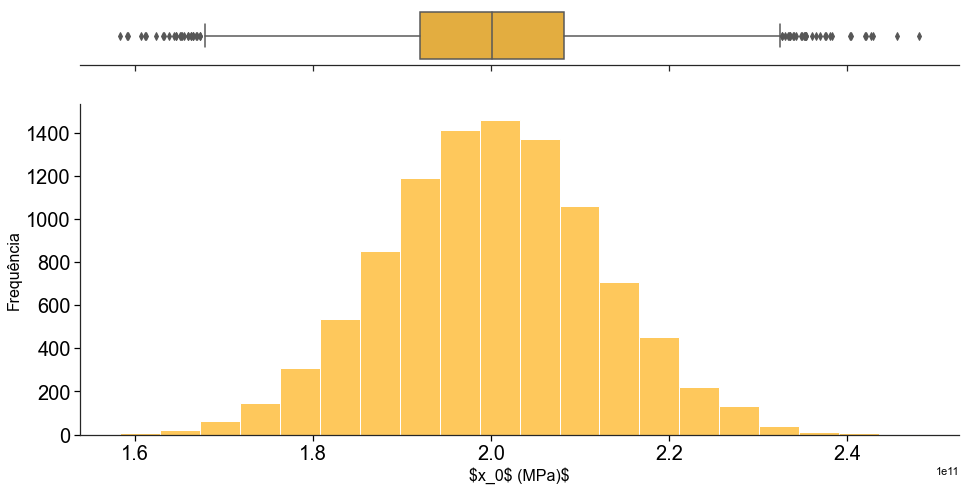

In [55]:
#Representação de histograma de frequência e boxplot da variável
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ (MPa)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

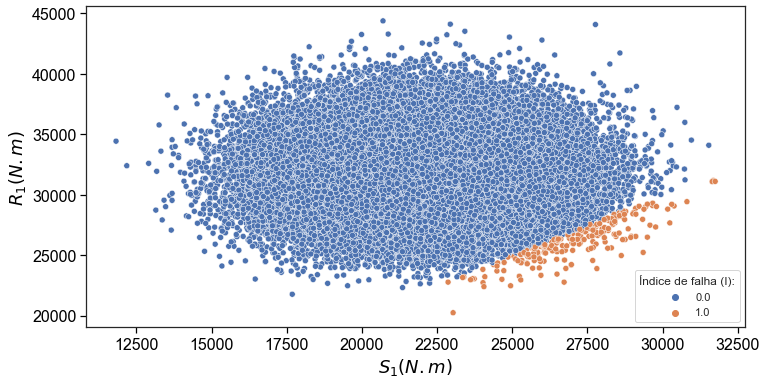

In [230]:
#Representação do gráfico de dispersão dos valores S_0, R_0  e índice de falha I.
OPCOES_GRAFICAS = {'NAME': '5P-NISE El5 I_0',
                'EXTENSION': '.jpeg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_1 (N.m)$',
                'Y AXIS LABEL': '$R_1 (N.m)$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Índice de falha (I):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

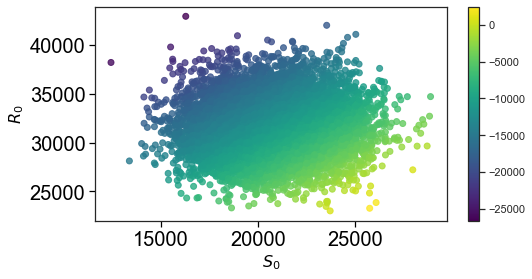

In [58]:
#Representação do gráfico de dispersão dos valores S_0 e R_0 com mapeamento de cores.
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

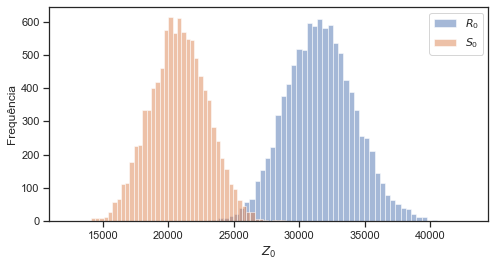

In [59]:
#Representação dos histogramas de frequência de S_0 e R_0 na região de interferência.
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#00000',
                    'X AXIS LABEL': '$Z_0$',
                    'Y AXIS LABEL': 'Frequência',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_0', 'Y DATA': 'S_0', 'G VALUE': 'G_0'}  

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Probabilidade de Falha',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'beta'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [96]:
RESULTS_TEST

[{'TOTAL RESULTS':                 X_0           X_1           X_2       X_3       X_4  \
  0      2.215835e+11  2.387814e+08  18924.820644  0.985706  1.037519   
  1      1.907875e+11  2.478534e+08  19609.006856  0.986588  1.011205   
  2      2.165991e+11  2.451328e+08  22991.661637  0.969609  1.026773   
  3      1.761252e+11  2.959432e+08  17899.683560  1.016840  1.018343   
  4      2.074457e+11  2.322457e+08  16658.490406  1.003898  1.019954   
  ...             ...           ...           ...       ...       ...   
  99995  2.137391e+11  2.406784e+08  18196.957786  0.995690  1.044552   
  99996  2.158843e+11  2.592049e+08  21520.415634  0.980546  0.987749   
  99997  2.040979e+11  2.631620e+08  22829.829979  0.977645  0.979455   
  99998  2.164612e+11  2.714099e+08  17119.053089  0.960244  0.961830   
  99999  2.099581e+11  2.547653e+08  15489.927695  0.960811  0.994640   
  
                X_5       X_6         X_7       X_8         X_9  ...       R_2  \
  0      138.367016  6